# Cluster de MNIST (tomado del archivo ejemploclusteringtsne)

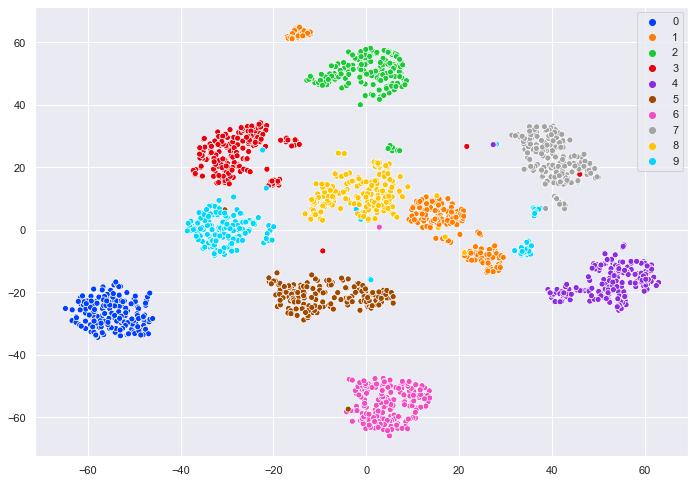

In [23]:
import numpy as np
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

# Este dataset es muy conocido, se trata de MNIST.
# X corresponde a 1797 imagenes de 8x8 binarias con los trazos manuales de digitos.
# y por otro lado tiene el numero asociado para cada uno de los 1797
X, y = load_digits(return_X_y=True)

# tSNE es una tecnica de reduccion de la dimensionalidad (ver Everitt).  
# Al reducir y transformar las dimensiones, es una tecnica de clustering.
tsne = TSNE()
 
# Se asigna directamente el valor de X y se lo transforma a dos dimensiones.
X_embedded = tsne.fit_transform(X)

# Se usa seaborn para hacer el plot de los puntos.
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)

plt.show()

# Clasificador de Mnist, con y sin t-SNE

In [17]:
# Horrible fix para evitar warnings causados por diferentes versiones de np y tensorflow
# https://github.com/tensorflow/tensorflow/issues/30427
import warnings
warnings.filterwarnings('ignore')

from keras.datasets import mnist
from time import time
import numpy as np

seed = 19960614
np.random.seed(seed)

## Genero un árbol sin t-SNE

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Genero un arbol sin t-sne para comparar
from sklearn.tree import DecisionTreeClassifier

arbol_sin_tsne = DecisionTreeClassifier(max_depth=10, random_state=seed)

# Hago un flatten porque el arbol me pide que sea de dimension 2
x_train = [np.concatenate(i) for i in x_train]
x_test = [np.concatenate(i) for i in x_test]

t0 = time()
arbol_sin_tsne.fit(x_train, y_train)
t1 = time()

print('Tiempo que tarda en entrenar el modelo: {}'.format(round(t1-t0, 2)))

resultado_sin_tsne = arbol_sin_tsne.predict(x_test)

from sklearn.metrics import accuracy_score

print('Accuracy sin tsne: {}'.format(round(accuracy_score(resultado_sin_tsne, y_test) * 100, 2)))

Tiempo que tarda en entrenar el modelo: 11.32707405090332
Accuracy sin tsne: 86.59


## Genero un árbol utilizando t-SNE

In [21]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = [np.concatenate(i) for i in x_train]
x_test = [np.concatenate(i) for i in x_test]

from sklearn.manifold import TSNE
tsne = TSNE()

t0 = time()
tsned_train = tsne.fit_transform(x_train)
tsned_test = tsne.fit_transform(x_test)
t1 = time()

print('Tiempo que tarda en convertir los datos: {}'.format(round(t1-t0,2)))

# tsned_train y test, por ser un manifold, deberia de ser dimension 2 (al ser una representacion de un grafo)
arbol_con_tsne = DecisionTreeClassifier(max_depth=10, random_state=seed)

t2 = time()
arbol_con_tsne.fit(tsned_train, y_train)
t3 = time()

print('Tiempo que tarda en entrenar el modelo: {}'.format(round(t2-t3,2)))

resultado_con_tsne = arbol_con_tsne.predict(tsned_test)

print('Accuracy con tsne: {}'.format(round(accuracy_score(resultado_con_tsne, y_test) * 100, 2)))

Tiempo que tarda en convertir los datos: 3778.2569921016693
Tiempo que tarda en entrenar el modelo: -0.2193739414215088
Accuracy con tsne: 3.26


## Mejora a t-SNE

Usando t-SNE, no solo tarde un tiempo mucho mayor, sino que el resultado obtenido es considerablemente peor.

Utilizando como guia: https://www.kaggle.com/carlolepelaars/97-on-mnist-with-a-single-decision-tree-t-sne

Previo a realizar el t-SNE, reduzco la dimensionalidad por medio de Truncated Singular Value Decomposition (TSVD).

Tiempo que tarda convertir los datos con tsvd: 5.75


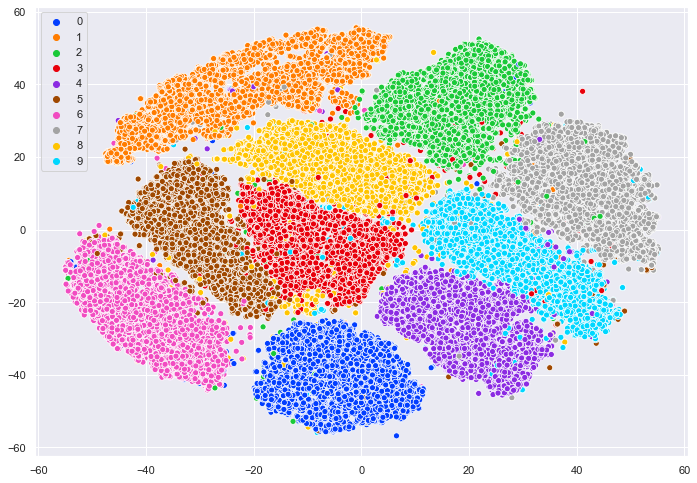

Tiempo que tarda convertir los datos de tsvd con tsne: 742.35
Tiempo que tarda en entrenar el modelo: 0.16
Accuracy con tsvd y tsne: 12.4


In [25]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

from sklearn.decomposition import TruncatedSVD

x_train = [np.concatenate(i) for i in x_train]
x_test = [np.concatenate(i) for i in x_test]

t0 = time()
tsvd_train = TruncatedSVD(n_components=50).fit_transform(x_train)
tsvd_test = TruncatedSVD(n_components=50).fit_transform(x_test)
t1 = time()

print('Tiempo que tarda convertir los datos con tsvd: {}'.format(round(t1-t0,2)))

from sklearn.manifold import TSNE
tsne = TSNE()

t2 = time()
tsned_train = tsne.fit_transform(tsvd_train)
tsned_test = tsne.fit_transform(tsvd_test)
t3 = time()

sns.scatterplot(tsned_train[:,0], tsned_train[:,1], hue=y_train, legend='full', palette=palette)

plt.show()

print('Tiempo que tarda convertir los datos de tsvd con tsne: {}'.format(round(t3-t2,2)))

arbol_con_tsne = DecisionTreeClassifier(max_depth=10, random_state=seed)

t4 = time()
arbol_con_tsne.fit(tsned_train, y_train)
t5 = time()

print('Tiempo que tarda en entrenar el modelo: {}'.format(round(t5-t4,2)))

resultado_con_tsne = arbol_con_tsne.predict(tsned_test)

print('Accuracy con tsvd y tsne: {}'.format(round(accuracy_score(resultado_con_tsne, y_test) * 100, 2)))